In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge
# evaluate knn on the sonar dataset with k-means ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
import time

In [63]:
heart = pd.read_csv('dataset/cardiovascular.txt',delimiter=';')
#heart2 = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')

In [64]:
dataset = heart

In [65]:
dataset.drop_duplicates(inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [66]:
dataset = dataset.drop('ind', axis=1)
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
dataset['famhist']= label_encoder.fit_transform(dataset['famhist'])
dataset 

sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
0    160    12.00   5.73      23.11        1     49    25.30    97.20   52   
1    144     0.01   4.41      28.61        0     55    28.87     2.06   63   
2    118     0.08   3.48      32.28        1     52    29.14     3.81   46   
3    170     7.50   6.41      38.03        1     51    31.99    24.26   58   
4    134    13.60   3.50      27.78        1     60    25.99    57.34   49   
..   ...      ...    ...        ...      ...    ...      ...      ...  ...   
457  214     0.40   5.98      31.72        0     64    28.45     0.00   58   
458  182     4.20   4.41      32.10        0     52    28.61    18.72   52   
459  108     3.00   1.59      15.23        0     40    20.09    26.64   55   
460  118     5.40  11.61      30.79        0     64    27.35    23.97   40   
461  132     0.00   4.82      33.41        1     62    14.70     0.00   46   

     chd  
0      1  
1      1  
2      0  
3      1  
4      1  
..   ...  
457    0  
458    1  
459    0  
460    0  
461    1  

[462 rows x 10 columns]

In [67]:
categorical_cols = dataset[['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']]
numerical_cols = dataset[['famhist']]
target_col = dataset[["chd"]]

In [68]:
from scipy import stats
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(numerical_cols))
print(z)

[[1.18585412]
 [0.84327404]
 [1.18585412]
 [1.18585412]
 [1.18585412]
 [1.18585412]
 [0.84327404]
 [1.18585412]
 [1.18585412]
 [1.18585412]
 [0.84327404]
 [1.18585412]
 [0.84327404]
 [0.84327404]
 [1.18585412]
 [1.18585412]
 [0.84327404]
 [1.18585412]
 [1.18585412]
 [1.18585412]
 [0.84327404]
 [1.18585412]
 [1.18585412]
 [0.84327404]
 [0.84327404]
 [1.18585412]
 [0.84327404]
 [0.84327404]
 [1.18585412]
 [0.84327404]
 [0.84327404]
 [0.84327404]
 [1.18585412]
 [0.84327404]
 [0.84327404]
 [0.84327404]
 [0.84327404]
 [0.84327404]
 [1.18585412]
 [1.18585412]
 [1.18585412]
 [0.84327404]
 [0.84327404]
 [1.18585412]
 [0.84327404]
 [0.84327404]
 [1.18585412]
 [1.18585412]
 [0.84327404]
 [0.84327404]
 [1.18585412]
 [0.84327404]
 [0.84327404]
 [1.18585412]
 [0.84327404]
 [0.84327404]
 [0.84327404]
 [0.84327404]
 [0.84327404]
 [1.18585412]
 [0.84327404]
 [1.18585412]
 [1.18585412]
 [0.84327404]
 [0.84327404]
 [1.18585412]
 [1.18585412]
 [0.84327404]
 [1.18585412]
 [0.84327404]
 [0.84327404]
 [0.84

In [69]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


In [70]:
#filtering outliers retaining only those data points which are below threshhold
#dataset = dataset[(z < 3).all(axis=1)]


In [71]:
dataset

sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
0    160    12.00   5.73      23.11        1     49    25.30    97.20   52   
1    144     0.01   4.41      28.61        0     55    28.87     2.06   63   
2    118     0.08   3.48      32.28        1     52    29.14     3.81   46   
3    170     7.50   6.41      38.03        1     51    31.99    24.26   58   
4    134    13.60   3.50      27.78        1     60    25.99    57.34   49   
..   ...      ...    ...        ...      ...    ...      ...      ...  ...   
457  214     0.40   5.98      31.72        0     64    28.45     0.00   58   
458  182     4.20   4.41      32.10        0     52    28.61    18.72   52   
459  108     3.00   1.59      15.23        0     40    20.09    26.64   55   
460  118     5.40  11.61      30.79        0     64    27.35    23.97   40   
461  132     0.00   4.82      33.41        1     62    14.70     0.00   46   

     chd  
0      1  
1      1  
2      0  
3      1  
4      1  
..   ...  
457    0  
458    1  
459    0  
460    0  
461    1  

[462 rows x 10 columns]

In [72]:
len(dataset)

462

In [73]:
X = dataset.iloc[:, 0:-1].values

y = dataset.iloc[:, -1].values

In [74]:
#Standerdize
def standardise(X):
    scaler = StandardScaler()
    scaler.fit(X)
    scaled_features = scaler.transform(X) # centering and scaling
    return(scaled_features)

## Train the LG Classifier

In [75]:
def calculate_model(param,X,y):
    
    recall_list_10 = []
    precision_list_10 = []
    specificity_10 = []
    f1_list_10 = []
    accuracy_10 = []
    cpu_10 = []
    roc_10 = []
    

    kfold = KFold(n_splits=10, shuffle=True)
    for i in range(30):
        recall_list = []
        precision_list = []
        specificity = []
        f1_list = []
        accuracy = []
        cpu = []
        roc_list = []
        



        for train_ix, test_ix in kfold.split(X, y):




            X_train , X_test = X[train_ix],X[test_ix]
            y_train , y_test = y[train_ix] , y[test_ix]
            
            t0= time.time()
            if (param == 0):
                model = LogisticRegression()
                
            else:
                model = LogisticRegression(C=param['C'], penalty = param['penalty'])

          

            model.fit(X_train,y_train)
            predictions = model.predict(X_test)
            probs = model.predict_proba(X_test)
            probs = probs[:, 1]
            t1 = time.time() - t0
                        #print("Time elapsed: ", t1) # CPU seconds elapsed (floating point)
            cm = confusion_matrix(y_test,predictions)
            f1_list.append(f1_score(y_test, predictions, average="weighted")*100)

            recall_list.append(recall_score(y_test, predictions, average="weighted")*100)
            precision_list.append(precision_score(y_test, predictions, average="weighted")*100)
            specificity1 = cm[1,1]/(cm[0,1]+cm[1,1])
            if not np.isnan(specificity1):
                specificity.append( (cm[1,1]/(cm[0,1]+cm[1,1]))*100)
            accuracy.append(accuracy_score(y_test, predictions)*100)
            roc_list.append(roc_auc_score(y_test, probs)*100)
            cpu.append(t1)

        precision_list_10.append(sum(precision_list)/10)
        specificity_10.append(sum(specificity)/len(specificity))
        f1_list_10.append(sum(f1_list)/10)
        accuracy_10.append(sum(accuracy)/10)
        recall_list_10.append(sum(recall_list)/10)
        roc_10.append(sum(roc_list)/10)
        cpu_10.append(sum(cpu)/10)



   
    accu = sum(accuracy_10)/30
    pre = sum(precision_list_10)/30
    spec = sum(specificity_10)/30
    rec =  sum(recall_list_10)/30
    f1 =  sum(f1_list_10)/30
    roc = sum(roc_10)/30
    cpu = sum(cpu_10)/30
    return([accu,pre,spec,rec,f1,roc,cpu])



## Grid serach 

In [76]:
from sklearn.model_selection import GridSearchCV
def grid_search():
    
    logreg =LogisticRegression()
    grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

    grid = GridSearchCV(logreg,param_grid=grid_values )
    grid.fit(X_train,y_train)
    grid.best_params_
    return(grid.best_params_)


In [77]:
dict_LG = {}

## First Model without preprocessing 

In [184]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

#from collections import defaultdict
scaled_features = standardise(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)

param = 0
X=scaled_features
result = calculate_model(param,X,y)
    
dict_LG['LG'] = result
dict_LG


{'LG': [72.28769657724328,
  72.21878117993087,
  62.431437254695766,
  72.28769657724328,
  71.42403172481032,
  77.54216273611289,
  0.002535587946573894]}

## Hypertune model using grid search

In [185]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)

param = grid_search()
#print(param)
X=scaled_features
result = calculate_model(param,X,y)
dict_LG['Hypertuned'] = result
dict_LG

{'LG': [72.28769657724328,
  72.21878117993087,
  62.431437254695766,
  72.28769657724328,
  71.42403172481032,
  77.54216273611289,
  0.002535587946573894],
 'Hypertuned': [72.77166204131976,
  72.62288556560065,
  64.19137810360719,
  72.77166204131976,
  71.72033158482736,
  77.828958580212,
  0.0026191560427347815]}

## PCA

In [83]:
from sklearn.decomposition import PCA
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)
pca = PCA(n_components = 5)
pca.fit(scaled_features)
x_pca = pca.transform(scaled_features)

In [187]:
pca.explained_variance_ratio_

array([0.32053161, 0.13301465, 0.11952794, 0.10496855, 0.09287428])

In [188]:
df_comp = pd.DataFrame(pca.components_,columns=dataset.iloc[:, 0:-1].columns)

<AxesSubplot:>

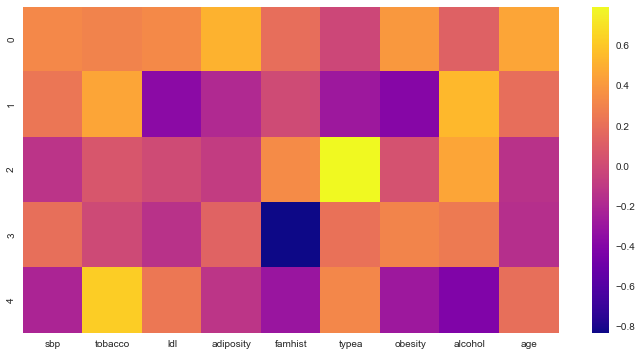

In [189]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [190]:
X = x_pca
y = dataset.iloc[:, -1].values
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=101)
param = grid_search()
print(param)
result = calculate_model(param,X,y)
dict_LG['Pca'] = result
dict_LG

{'C': 1, 'penalty': 'l2'}


{'LG': [72.28769657724328,
  72.21878117993087,
  62.431437254695766,
  72.28769657724328,
  71.42403172481032,
  77.54216273611289,
  0.002535587946573894],
 'Hypertuned': [72.77166204131976,
  72.62288556560065,
  64.19137810360719,
  72.77166204131976,
  71.72033158482736,
  77.828958580212,
  0.0026191560427347815],
 'Pca': [73.3777366635831,
  73.43703876914613,
  65.19911747465926,
  73.3777366635831,
  72.32759741324406,
  77.6238564951238,
  0.0020852073033650717]}

## Feature Importance

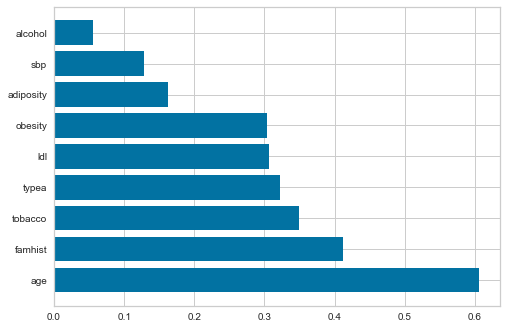

In [191]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)
features_names = ['sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age']
svm = LogisticRegression()
svm.fit(X_train, y_train)
f_importances(abs(svm.coef_[0]), features_names, top=9)


In [192]:

X = dataset[['age','famhist','tobacco','typea','ldl']].values

y = dataset.iloc[:, -1].values
scaled_features = standardise(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)

param = grid_search()
#print(param)
X=scaled_features
result = calculate_model(param,X,y)
dict_LG['FImp'] = result
dict_LG

{'LG': [72.28769657724328,
  72.21878117993087,
  62.431437254695766,
  72.28769657724328,
  71.42403172481032,
  77.54216273611289,
  0.002535587946573894],
 'Hypertuned': [72.77166204131976,
  72.62288556560065,
  64.19137810360719,
  72.77166204131976,
  71.72033158482736,
  77.828958580212,
  0.0026191560427347815],
 'Pca': [73.3777366635831,
  73.43703876914613,
  65.19911747465926,
  73.3777366635831,
  72.32759741324406,
  77.6238564951238,
  0.0020852073033650717],
 'FImp': [73.7132284921369,
  74.05929571593568,
  66.07658046549552,
  73.7132284921369,
  72.73392392287319,
  78.35986457336908,
  0.0021415352821350093]}

## Permutation Importance


In [193]:
#pip install eli5

In [194]:
import eli5
from eli5.sklearn import PermutationImportance
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)
svc =  LogisticRegression()
svc.fit(X_train, y_train) 
# create permutation importance object using model
# and fit on test set
perm = PermutationImportance(svc, random_state=1).fit(X_test, y_test)
  
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names =['sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age'])

In [195]:


X = dataset[['famhist','age','ldl','typea','tobacco']].values

y = dataset.iloc[:, -1].values
scaled_features = standardise(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)

param = grid_search()
#print(param)
X=scaled_features
result = calculate_model(param,X,y)
dict_LG['Permutations'] = result
dict_LG


{'LG': [72.28769657724328,
  72.21878117993087,
  62.431437254695766,
  72.28769657724328,
  71.42403172481032,
  77.54216273611289,
  0.002535587946573894],
 'Hypertuned': [72.77166204131976,
  72.62288556560065,
  64.19137810360719,
  72.77166204131976,
  71.72033158482736,
  77.828958580212,
  0.0026191560427347815],
 'Pca': [73.3777366635831,
  73.43703876914613,
  65.19911747465926,
  73.3777366635831,
  72.32759741324406,
  77.6238564951238,
  0.0020852073033650717],
 'FImp': [73.7132284921369,
  74.05929571593568,
  66.07658046549552,
  73.7132284921369,
  72.73392392287319,
  78.35986457336908,
  0.0021415352821350093],
 'Permutations': [73.75269811902558,
  73.85437445174064,
  66.12777018876089,
  73.75269811902558,
  72.67427036716596,
  78.38997748756589,
  0.001841448942820231]}

## Sequential Forward Selection

In [54]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)
svc =  LogisticRegression()
sfs = SFS(svc, 
          k_features=8, 
          forward=True, 
          floating=False, 
          scoring='accuracy',

          n_jobs=-1)
sfs = sfs.fit(X_train, y_train)

print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print(sfs.k_feature_names_)
print('CV Score:')
print(sfs.k_score_)


Sequential Forward Selection (k=3):
(0, 1, 2, 3, 5, 6, 7, 8)
('0', '1', '2', '3', '5', '6', '7', '8')
CV Score:
0.7045908922621252


In [ ]:
feat_cols = list(sfs.k_feature_idx_)
feat_cols
X_train = X_train[:, feat_cols]
X_test = X_test[:, feat_cols]
X=scaled_features
X = X[:,feat_cols]
param =  grid_search()
result = calculate_model(param,X,y)
dict_LG['SFS'] = result


In [59]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)
svc =  LogisticRegression()
sfs = SFS(svc, 
          k_features=3, 
          forward=False, 
          floating=False, 
          scoring='accuracy',

          n_jobs=-1)
sfs = sfs.fit(X_train, y_train)

print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print(sfs.k_feature_names_)
print('CV Score:')
print(sfs.k_score_)


Sequential Forward Selection (k=3):
(2, 4, 8)
('2', '4', '8')
CV Score:
0.728878193261755


In [60]:
feat_cols = list(sfs.k_feature_idx_)
feat_cols
X_train = X_train[:, feat_cols]
X_test = X_test[:, feat_cols]
X=scaled_features
X = X[:,feat_cols]
param =  grid_search()
result = calculate_model(param,X,y)
dict_LG['SBS'] = result
result

[73.09821153253161,
 73.06077837528007,
 64.73776812998948,
 73.09821153253161,
 72.12692369152755,
 76.3132278196313,
 0.0024754357337951663]

In [ ]:
dict_LG

## RFE


In [201]:
from sklearn.feature_selection import RFE
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)
model=LogisticRegression()
rfe = RFE(model, n_features_to_select=5, step=1, verbose=2)
rfe = rfe.fit(X_train, y_train)
rfe.support_

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


array([False,  True,  True, False,  True,  True, False, False,  True])

In [202]:
#'sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age'
X = dataset[['tobacco','ldl','famhist','typea','age']].values

y = dataset.iloc[:, -1].values
scaled_features = standardise(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)

param = grid_search()
#print(param)
X=scaled_features
result = calculate_model(param,X,y)
dict_LG['RFE'] = result


In [ ]:
dict_LG

## K-means

In [88]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)


model = KMeans()
#visualizer = KElbowVisualizer(model, k=(1,12)).fit(scaled_features)
#visualizer.show()

In [89]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=0).fit(scaled_features)

In [90]:
y= kmeans.predict(scaled_features)

In [91]:
df = pd.DataFrame(scaled_features , columns= ['sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age'])
#df['Cluster'] = y
df.head()

sbp   tobacco       ldl  adiposity   famhist     typea   obesity  \
0  1.058564  1.823073  0.478412  -0.295503  1.185854 -0.418470 -0.176786   
1  0.277089 -0.790237 -0.159680   0.412140 -0.843274  0.193344  0.671373   
2 -0.992806 -0.774980 -0.609245   0.884332  1.185854 -0.112563  0.735519   
3  1.546985  0.842264  0.807126   1.624141  1.185854 -0.214532  1.412621   
4 -0.211332  2.171805 -0.599577   0.305351  1.185854  0.703189 -0.012856   

    alcohol       age  
0  3.277738  0.629336  
1 -0.612745  1.383115  
2 -0.541183  0.218184  
3  0.295062  1.040488  
4  1.647775  0.423760

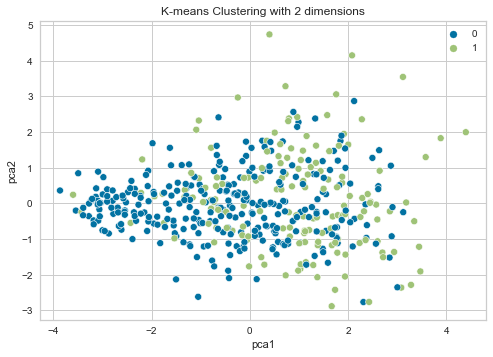

In [84]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(scaled_features)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=y, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [209]:
scaled_features = standardise(X)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],y,
                                                    test_size=0.2, random_state=401
                                                   )
param =grid_search()
#print(param)
X=scaled_features
result = calculate_model(param,X,y)
dict_LG['kmeans'] = result

In [92]:
import shap

In [93]:
import xgboost
model = xgboost.XGBClassifier().fit(df, y)

# compute SHAP values
explainer = shap.Explainer(model, df)
shap_values = explainer(df)

[22:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


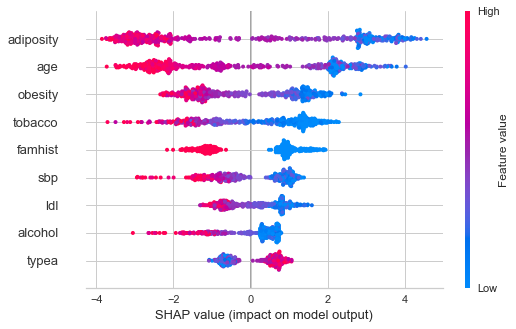

In [94]:
shap.plots.beeswarm(shap_values)

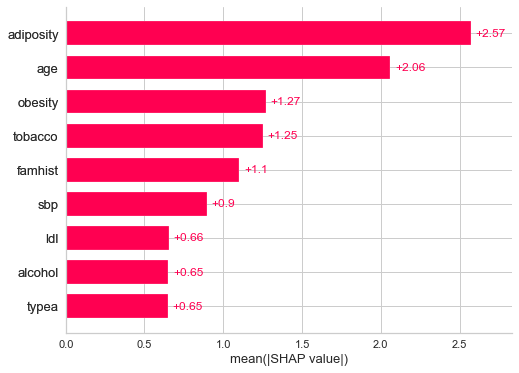

In [95]:
shap.plots.bar(shap_values)

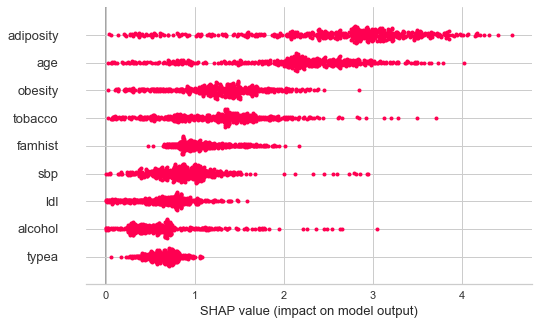

In [213]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

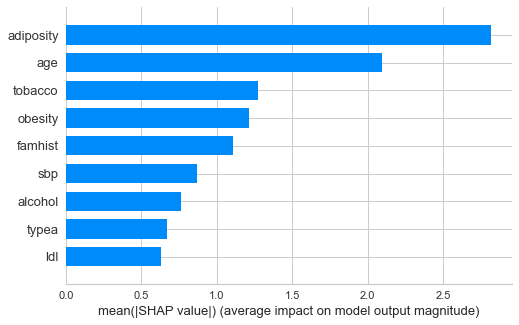

In [217]:
shap_values = shap.TreeExplainer(model).shap_values(df)
shap.summary_plot(shap_values, df, plot_type="bar")

In [219]:

X = dataset[['sbp','tobacco','adiposity','famhist','obesity','age','alcohol','ldl']].values
scaled_features = standardise(X)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.2, random_state=401
                                                   )
param =grid_search()
#print(param)
X=scaled_features
result = calculate_model(param,X,y)
result
dict_LG['kmeans+Shap'] = result
result

[98.30450200431696,
 98.38616668770042,
 97.96320748700107,
 98.30450200431696,
 98.30498726821953,
 99.9156023741018,
 0.0033028443654378255]

In [ ]:
df_dict = pd.DataFrame.from_dict(dict_LG,orient='index', columns= ['Accuracy','Precision','Specificity','Recall','F1_score','Roc','CPU_time'])
df_dict

In [216]:
#df_dict.to_excel('xl_result\LG_SA_30.xlsx')

In [5]:
#df_dict =  pd.read_excel('xl_result/LG_SA_30.xlsx',index_col=0)

In [61]:
# Adding Number of features
df_dict['no_of_features'] = [9,9,'5 components',5,5,8,3,5,9,8]
df_dict

Accuracy  Precision  Specificity     Recall   F1_score  \
LG            72.446500  72.518118    63.078854  72.446500  71.599879   
Hypertuned    72.727105  72.865846    64.621208  72.727105  71.708238   
Pca           73.510022  73.646828    65.450106  73.510022  72.450478   
FImp          73.849830  73.866108    66.096916  73.849830  72.801723   
Permutations  73.860623  74.017594    66.240339  73.860623  72.885399   
SFS           70.537157  70.377507    60.730494  70.537157  69.259723   
SBS           72.335183  72.568127    62.651590  72.335183  71.568958   
RFE           73.964076  74.259928    66.655180  73.964076  72.976207   
kmeans        99.012180  99.053403    98.790792  99.012180  99.012502   
kmeans+Shap   98.302806  98.373867    97.977278  98.302806  98.303751   

                    Roc  CPU_time no_of_features  
LG            77.478200  0.002696              9  
Hypertuned    77.738933  0.002297              9  
Pca           77.664802  0.001986   5 components  
FImp          78.314251  0.001989              5  
Permutations  78.387170  0.001967              5  
SFS           75.653569  0.002944              8  
SBS           76.730867  0.002407              3  
RFE           78.303625  0.001971              5  
kmeans        99.972013  0.004418              9  
kmeans+Shap   99.899660  0.003281              8